In [1]:
# from pinder.core import get_pinder_location

# get_pinder_location()

In [2]:
from pinder.core import get_index

index = get_index()

In [3]:
val_set = index.query("split == 'val'").reset_index(drop=True)
test_set = index.query("split == 'test'").reset_index(drop=True)

In [4]:
val_set.groupby("split").count().id

/tmp/ipykernel_2162787/1595108085.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  val_set.groupby("split").count().id


split
test          0
val        1958
train         0
invalid       0
Name: id, dtype: int64

In [5]:
val_set[
    [
        "split",
        "id",
        "pdb_id",
        "cluster_id",
        "cluster_id_R",
        "cluster_id_L",
        "uniprot_R",
        "uniprot_L",
        "holo_R_pdb",
        "holo_L_pdb",
        "chain_R",
        "chain_L",
    ]
]  # .to_csv("./data/pinder_val_systems.csv", index=False)

,split,id,pdb_id,cluster_id,cluster_id_R,cluster_id_L,uniprot_R,uniprot_L,holo_R_pdb,holo_L_pdb,chain_R,chain_L
0,val,1wtd__B1_Q9RPJ3--1wtd__A1_Q9RPJ3,1wtd,cluster_12608_12608,cluster_12608,cluster_12608,Q9RPJ3,Q9RPJ3,1wtd__B1_Q9RPJ3-R.pdb,1wtd__A1_Q9RPJ3-L.pdb,B1,A1
1,val,2oxg__B1_Q9LCU9--2oxg__A1_Q9LCU8,2oxg,cluster_8322_8323,cluster_8322,cluster_8323,Q9LCU9,Q9LCU8,2oxg__B1_Q9LCU9-R.pdb,2oxg__A1_Q9LCU8-L.pdb,B1,A1
2,val,1z5y__B1_P0AA86--1z5y__A1_P36655,1z5y,cluster_2090_2091,cluster_2090,cluster_2091,P0AA86,P36655,1z5y__B1_P0AA86-R.pdb,1z5y__A1_P36655-L.pdb,B1,A1
3,val,7drb__B1_A0A2I8B6R1--7drb__A1_Q30BZ2,7drb,cluster_16810_3302,cluster_16810,cluster_3302,A0A2I8B6R1,Q30BZ2,7drb__B1_A0A2I8B6R1-R.pdb,7drb__A1_Q30BZ2-L.pdb,B1,A1
4,val,2p1a__B1_Q739H9--2p1a__A1_Q739H9,2p1a,cluster_7503_7503,cluster_7503,cluster_7503,Q739H9,Q739H9,2p1a__B1_Q739H9-R.pdb,2p1a__A1_Q739H9-L.pdb,B1,A1
...,...,...,...,...,...,...,...,...,...,...,...,...
1953,val,4d4u__A1_Q4WW81--4d4u__B1_Q4WW81,4d4u,cluster_4530_4530,cluster_4530,cluster_4530,Q4WW81,Q4WW81,4d4u__A1_Q4WW81-R.pdb,4d4u__B1_Q4WW81-L.pdb,A1,B1
1954,val,3o0q__A1_O33839--3o0q__B1_O33839,3o0q,cluster_5012_5012,cluster_5012,cluster_5012,O33839,O33839,3o0q__A1_O33839-R.pdb,3o0q__B1_O33839-L.pdb,A1,B1
1955,val,3ua3__A1_P46580--3ua3__B1_P46580,3ua3,cluster_4512_4512,cluster_4512,cluster_4512,P46580,P46580,3ua3__A1_P46580-R.pdb,3ua3__B1_P46580-L.pdb,A1,B1
1956,val,4okj__A1_P9WJ73--4okj__B1_P9WJ73,4okj,cluster_18593_18593,cluster_18593,cluster_18593,P9WJ73,P9WJ73,4okj__A1_P9WJ73-R.pdb,4okj__B1_P9WJ73-L.pdb,A1,B1


In [6]:
# Take about 10 mins

# import dill
# from pinder.core import get_systems

# local_paths = {}
# for system in get_systems(list(val_set.id)):
#     local_paths[system.entry.id] = system.filepaths


# with open("./data/pinder_val_local_paths.pkl", "wb") as f:
#     dill.dump(local_paths, f)

In [7]:
# Take about 10 mins

# import dill
# from pinder.core import get_systems

# local_paths = {}
# for system in get_systems(list(test_set.id)):
#     local_paths[system.entry.id] = system.filepaths


# with open("./data/pinder_test_local_paths.pkl", "wb") as f:
#     dill.dump(local_paths, f)

In [8]:
import dill

with open("./data/pinder_val_local_paths.pkl", "rb") as f:
    val_local_paths = dill.load(f)

with open("./data/pinder_test_local_paths.pkl", "rb") as f:
    test_local_paths = dill.load(f)

In [9]:
for idx, each in enumerate(val_local_paths):
    test_case = val_local_paths[each]
    ligand_path = test_case["holo_ligand"]
    ligand_path = (
        ligand_path.parent.parent
        / f"protonated_{ligand_path.parent.stem}"
        / f"{ligand_path.stem}_protonated.pdb"
    )

    receptor_path = test_case["holo_receptor"]
    receptor_path = (
        receptor_path.parent.parent
        / f"protonated_{receptor_path.parent.stem}"
        / f"{receptor_path.stem}_protonated.pdb"
    )

    if idx == 1:
        break

In [10]:
from prolif.io.protein_helper import ProteinHelper
from prolif.molecule import Molecule
from rdkit import Chem

protein_helper = ProteinHelper()
protein_L = Chem.MolFromPDBFile(
    str(ligand_path),
    sanitize=False,
    removeHs=False,
    proximityBonding=True,
)
protein_L_mol = protein_helper.standardize_protein(Molecule.from_rdkit(protein_L))

protein_R = Chem.MolFromPDBFile(
    str(receptor_path),
    sanitize=False,
    removeHs=False,
    proximityBonding=True,
)
protein_R_mol = protein_helper.standardize_protein(Molecule.from_rdkit(protein_R))

# Implicit protein preparation
protein_L_mol_i = protein_helper.standardize_protein(Molecule.from_rdkit(protein_L))

protein_R_mol_i = protein_helper.standardize_protein(Molecule.from_rdkit(protein_R))

/home/yuyang/Project_local/GSoC2025_Hbond_PM/.venv/lib/python3.11/site-packages/MDAnalysis/topology/tables.py:52: DeprecationWarning: Deprecated in version 2.8.0
MDAnalysis.topology.tables has been moved to MDAnalysis.guesser.tables. This import point will be removed in MDAnalysis version 3.0.0
  warnings.warn(wmsg, category=DeprecationWarning)
/home/yuyang/Project_local/GSoC2025_Hbond_PM/.venv/lib/python3.11/site-packages/prolif/io/protein_helper.py:161: UserWarning: Could not guess the forcefield based on the residue names. CYS is assigned to neutral CYS (charge = 0).
  standardized_resname = self.convert_to_standard_resname(


In [11]:
print("ligand:", protein_L_mol.residues.__len__())  # noqa: T201
print("receptor:", protein_R_mol.residues.__len__())  # noqa: T201

ligand: 108
receptor: 112


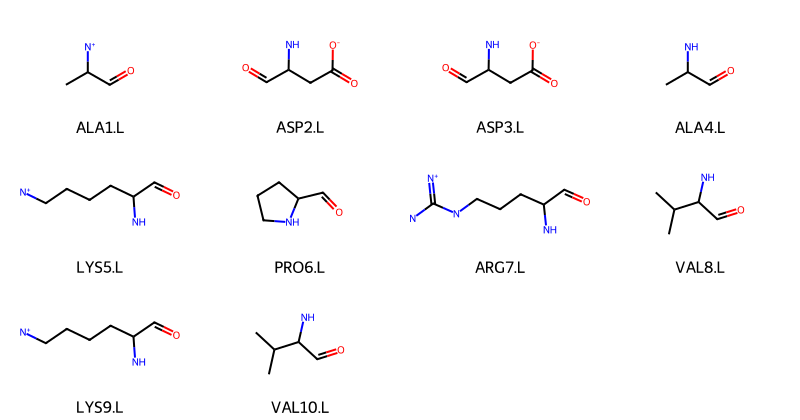

In [12]:
import prolif as plf

plf.display_residues(protein_L_mol, slice(0, 10), sanitize=False)

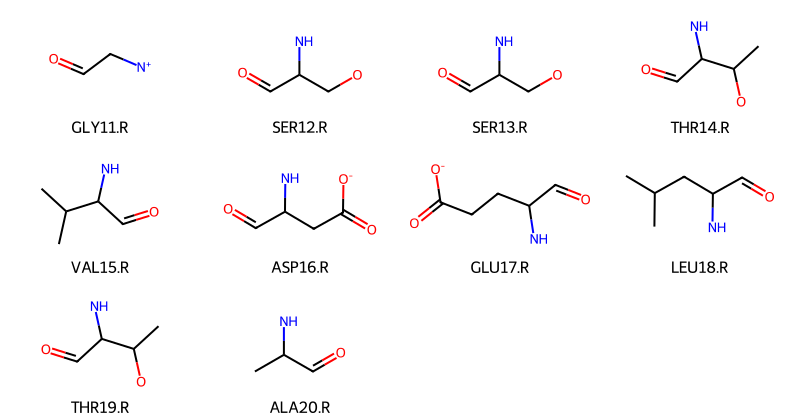

In [13]:
plf.display_residues(protein_R_mol, slice(0, 10), sanitize=False)

In [14]:
fp = plf.Fingerprint(["HBDonor", "HBAcceptor"], count=True)

fp.run_from_iterable([protein_L_mol], protein_R_mol)

fp_i = plf.Fingerprint(["ImplicitHBDonor", "ImplicitHBAcceptor"], count=True)
fp_i.run_from_iterable([protein_L_mol_i], protein_R_mol_i)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

<prolif.fingerprint.Fingerprint: 2 interactions: ['ImplicitHBDonor', 'ImplicitHBAcceptor'] at 0x7f7f0ebfac90>

In [15]:
df = fp.to_dataframe().T
df

Frame                        0
ligand  protein interaction   
MET30.L ARG90.R HBAcceptor   2
ASN59.L ALA79.R HBAcceptor   1
VAL60.L GLY77.R HBAcceptor   1
ASP62.L ASN75.R HBDonor      1
                HBAcceptor   1
ALA64.L THR73.R HBDonor      1
                HBAcceptor   1
ASP66.L VAL71.R HBDonor      1
PRO67.L ARG90.R HBAcceptor   1
ALA68.L ARG90.R HBAcceptor   1
SER70.L ARG88.R HBDonor      1
THR71.L ARG90.R HBAcceptor   1
GLU76.L ARG84.R HBAcceptor   2
        ALA86.R HBDonor      1
                HBAcceptor   1
ASP78.L ALA81.R HBAcceptor   1
        ARG84.R HBAcceptor   2
LYS80.L ALA79.R HBDonor      1

In [16]:
df_i = fp_i.to_dataframe().T
df_i

Frame                               0
ligand  protein interaction          
MET30.L ARG90.R ImplicitHBAcceptor  1
ASN59.L PRO78.R ImplicitHBAcceptor  1
        ALA79.R ImplicitHBAcceptor  1
VAL60.L GLY77.R ImplicitHBAcceptor  1
ASP62.L ASN75.R ImplicitHBDonor     1
                ImplicitHBAcceptor  1
ALA64.L THR73.R ImplicitHBDonor     1
                ImplicitHBAcceptor  1
ASP66.L VAL71.R ImplicitHBDonor     1
PRO67.L ARG90.R ImplicitHBAcceptor  1
ALA68.L ARG90.R ImplicitHBAcceptor  1
SER70.L ARG88.R ImplicitHBDonor     1
THR71.L ARG90.R ImplicitHBAcceptor  1
TYR74.L THR87.R ImplicitHBAcceptor  1
GLU76.L ARG84.R ImplicitHBAcceptor  2
        ALA86.R ImplicitHBDonor     1
                ImplicitHBAcceptor  1
ASP78.L ALA81.R ImplicitHBAcceptor  1
        ARG84.R ImplicitHBAcceptor  2
LYS80.L ALA79.R ImplicitHBDonor     1

In [17]:
from prolif.plotting.complex3d import Complex3D

# create Complex3D objects (explicit)
comp3D = Complex3D.from_fingerprint(fp, protein_L_mol, protein_R_mol, frame=0)
# (implicit)
other_comp3D = Complex3D.from_fingerprint(
    fp_i, protein_L_mol_i, protein_R_mol_i, frame=0
)

# compare the two Complex3D objects
view = comp3D.compare(other_comp3D, display_all=True)
view

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [18]:
from utils.metrics import (
    confusion_matrix,
    get_interactions,
    plot_confusion_matrix,
    tanimoto_coefficient_by_confusion_matrix,
)

In [19]:
explicit_set = get_interactions(df)
implicit_set = get_interactions(df_i)

matrix = confusion_matrix(explicit_set, implicit_set)
tm_coef = tanimoto_coefficient_by_confusion_matrix(matrix)

Tanimoto coefficient: 0.9


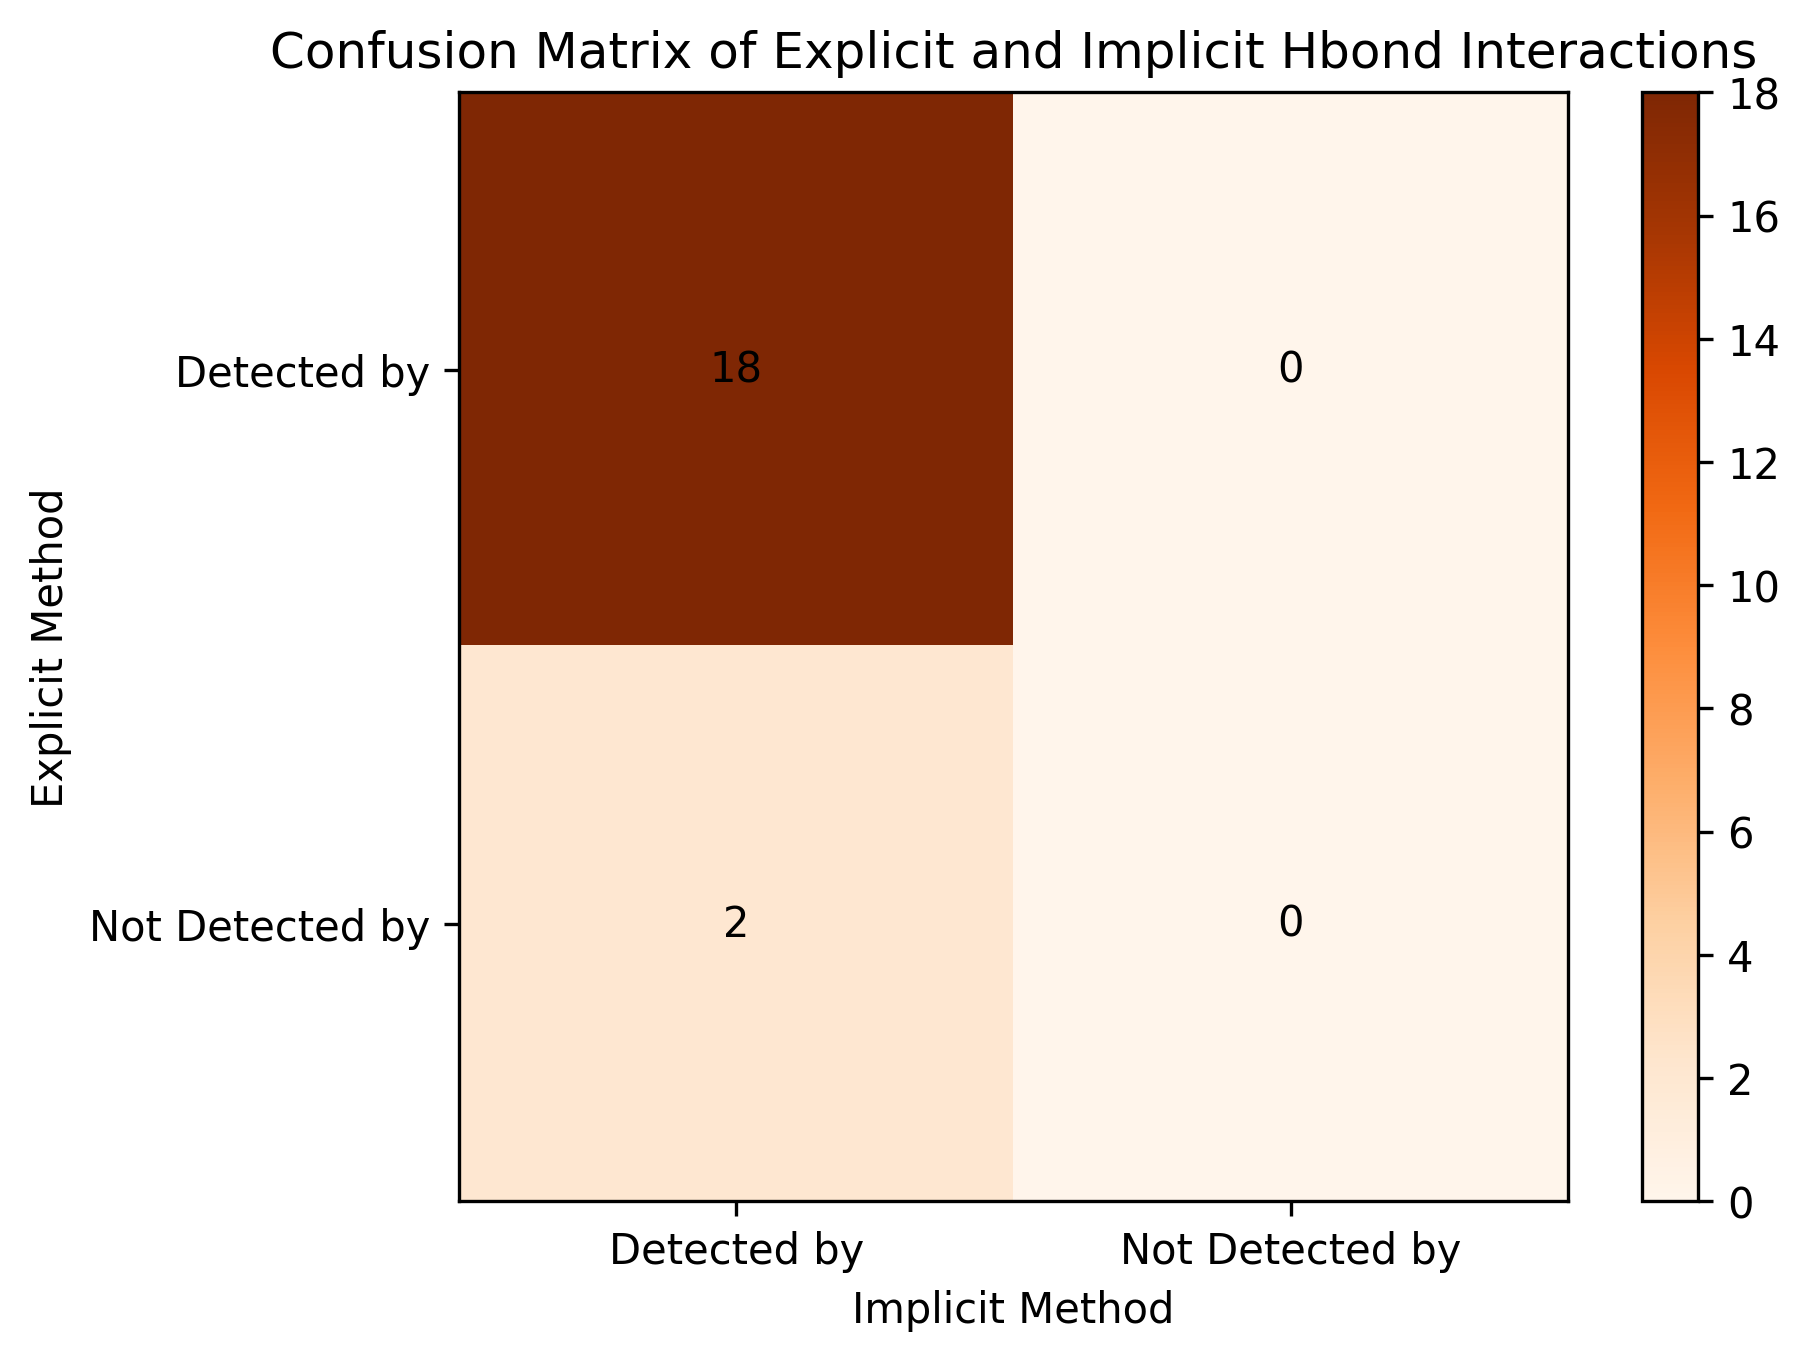

In [19]:
print("Tanimoto coefficient:", tm_coef)  # noqa: T201
fig, ax = plot_confusion_matrix(matrix)
fig.show()

In [20]:
import os
import warnings

from tqdm import tqdm

warnings.filterwarnings("ignore")


dfs = []
fps = []
dfs_i = []
fps_i = []


for idx in tqdm(val_set.index):
    # Load explicit fingerprint
    if not os.path.exists(f"./pinder_val/explicit/fp_{idx}.pkl"):  # noqa: PTH110
        print(f"Explicit fingerprint for index {idx} not found, skipping.")  # noqa: T201
        continue
    if not os.path.exists(f"./pinder_val/implicit/fp_{idx}.pkl"):  # noqa: PTH110
        print(f"Implicit fingerprint for index {idx} not found, skipping.")  # noqa: T201
        continue
    fp = plf.Fingerprint.from_pickle(f"./pinder_val/explicit/fp_{idx}.pkl")
    df = fp.to_dataframe().T
    dfs.append(df)
    fps.append(fp)

    # Load implicit fingerprint
    fp = plf.Fingerprint.from_pickle(f"./pinder_val/implicit/fp_{idx}.pkl")
    df = fp.to_dataframe().T
    dfs_i.append(df)
    fps_i.append(fp)

    if idx == 2000:
        break

  6%|▌         | 115/1958 [00:00<00:10, 171.37it/s]

Explicit fingerprint for index 73 not found, skipping.
Explicit fingerprint for index 84 not found, skipping.
Explicit fingerprint for index 104 not found, skipping.


  9%|▉         | 186/1958 [00:00<00:08, 209.14it/s]

Explicit fingerprint for index 148 not found, skipping.
Explicit fingerprint for index 193 not found, skipping.


 13%|█▎        | 258/1958 [00:01<00:07, 226.69it/s]

Explicit fingerprint for index 225 not found, skipping.
Explicit fingerprint for index 230 not found, skipping.


 20%|██        | 392/1958 [00:02<00:07, 206.58it/s]

Explicit fingerprint for index 365 not found, skipping.
Explicit fingerprint for index 387 not found, skipping.


 30%|███       | 589/1958 [00:03<00:07, 178.41it/s]

Explicit fingerprint for index 556 not found, skipping.
Explicit fingerprint for index 568 not found, skipping.


 34%|███▍      | 663/1958 [00:03<00:05, 217.04it/s]

Explicit fingerprint for index 634 not found, skipping.
Explicit fingerprint for index 659 not found, skipping.
Explicit fingerprint for index 663 not found, skipping.
Explicit fingerprint for index 671 not found, skipping.
Explicit fingerprint for index 677 not found, skipping.


 40%|████      | 792/1958 [00:03<00:04, 242.52it/s]

Explicit fingerprint for index 759 not found, skipping.
Explicit fingerprint for index 781 not found, skipping.
Explicit fingerprint for index 795 not found, skipping.
Explicit fingerprint for index 806 not found, skipping.


 42%|████▏     | 817/1958 [00:04<00:04, 229.58it/s]

Explicit fingerprint for index 819 not found, skipping.


 46%|████▌     | 891/1958 [00:04<00:06, 168.82it/s]

Explicit fingerprint for index 845 not found, skipping.
Explicit fingerprint for index 888 not found, skipping.
Explicit fingerprint for index 895 not found, skipping.


 48%|████▊     | 942/1958 [00:04<00:05, 202.71it/s]

Explicit fingerprint for index 909 not found, skipping.
Explicit fingerprint for index 919 not found, skipping.
Explicit fingerprint for index 948 not found, skipping.


 52%|█████▏    | 1018/1958 [00:05<00:04, 216.89it/s]

Explicit fingerprint for index 976 not found, skipping.
Explicit fingerprint for index 991 not found, skipping.
Explicit fingerprint for index 1019 not found, skipping.


 54%|█████▍    | 1065/1958 [00:05<00:03, 224.62it/s]

Explicit fingerprint for index 1037 not found, skipping.
Implicit fingerprint for index 1055 not found, skipping.


 57%|█████▋    | 1114/1958 [00:05<00:03, 228.95it/s]

Explicit fingerprint for index 1090 not found, skipping.


 59%|█████▉    | 1161/1958 [00:05<00:03, 221.56it/s]

Explicit fingerprint for index 1133 not found, skipping.
Explicit fingerprint for index 1135 not found, skipping.


 61%|██████    | 1185/1958 [00:05<00:03, 226.16it/s]

Explicit fingerprint for index 1182 not found, skipping.


 63%|██████▎   | 1231/1958 [00:06<00:05, 130.14it/s]

Explicit fingerprint for index 1194 not found, skipping.


 65%|██████▌   | 1276/1958 [00:06<00:04, 164.37it/s]

Explicit fingerprint for index 1248 not found, skipping.
Explicit fingerprint for index 1273 not found, skipping.


 69%|██████▊   | 1344/1958 [00:07<00:03, 199.18it/s]

Explicit fingerprint for index 1320 not found, skipping.
Explicit fingerprint for index 1336 not found, skipping.
Explicit fingerprint for index 1347 not found, skipping.


 73%|███████▎  | 1421/1958 [00:07<00:02, 233.73it/s]

Explicit fingerprint for index 1374 not found, skipping.


 75%|███████▌  | 1470/1958 [00:07<00:02, 228.47it/s]

Implicit fingerprint for index 1438 not found, skipping.
Explicit fingerprint for index 1482 not found, skipping.


 83%|████████▎ | 1623/1958 [00:08<00:01, 249.40it/s]

Explicit fingerprint for index 1584 not found, skipping.
Explicit fingerprint for index 1590 not found, skipping.
Explicit fingerprint for index 1596 not found, skipping.
Explicit fingerprint for index 1608 not found, skipping.
Explicit fingerprint for index 1610 not found, skipping.
Explicit fingerprint for index 1637 not found, skipping.


 85%|████████▌ | 1668/1958 [00:08<00:02, 116.34it/s]

Explicit fingerprint for index 1642 not found, skipping.
Explicit fingerprint for index 1675 not found, skipping.
Explicit fingerprint for index 1680 not found, skipping.


 88%|████████▊ | 1719/1958 [00:09<00:01, 161.57it/s]

Explicit fingerprint for index 1688 not found, skipping.
Explicit fingerprint for index 1701 not found, skipping.
Explicit fingerprint for index 1734 not found, skipping.
Explicit fingerprint for index 1735 not found, skipping.


 93%|█████████▎| 1818/1958 [00:09<00:00, 214.26it/s]

Implicit fingerprint for index 1779 not found, skipping.
Explicit fingerprint for index 1800 not found, skipping.


 96%|█████████▌| 1871/1958 [00:09<00:00, 230.37it/s]

Explicit fingerprint for index 1833 not found, skipping.


100%|██████████| 1958/1958 [00:10<00:00, 194.89it/s]

Explicit fingerprint for index 1930 not found, skipping.
Explicit fingerprint for index 1935 not found, skipping.
Explicit fingerprint for index 1947 not found, skipping.


In [21]:
len(dfs)

1894

In [22]:
import numpy as np
from utils.metrics import (
    get_interactions,
    positive_predictive_value,
    sensitivity,
    tanimoto_coefficient,
)
from utils.postprocess import get_metadata_from_implicit_hbond_using_set

# idx = 5
all_aaa_dev_list = []
all_daa_dev_list = []
all_dpa_list = []
all_apa_list = []
all_vhp_list = []

all_fp_aaa_dev_list = []
all_fp_daa_dev_list = []
all_fp_dpa_list = []
all_fp_apa_list = []
all_fp_avp_list = []
all_fp_vhp_list = []


tm_coefs = []
ppvs = []
sensitivities = []

for idx in range(len(dfs_i)):
    # Get the explicit interaction's implicit metadata
    explicit_set = get_interactions(dfs[idx])

    aaa_dev_list, daa_dev_list, dpa_list, apa_list, vina_hbond_potential_list = (
        get_metadata_from_implicit_hbond_using_set(explicit_set, fps_i[idx])
    )
    all_aaa_dev_list.extend(aaa_dev_list)
    all_daa_dev_list.extend(daa_dev_list)
    all_dpa_list.extend(dpa_list)
    all_apa_list.extend(apa_list)
    all_vhp_list.extend(vina_hbond_potential_list)

    # Get the false positive interaction's implicit metadata
    implicit_set = get_interactions(dfs_i[idx])
    false_positive_set = implicit_set - explicit_set
    false_negative_set = explicit_set - implicit_set
    fp_aaa_dev_list, fp_daa_dev_list, fp_dpa_list, fp_apa_list, fp_vhp_list = (
        get_metadata_from_implicit_hbond_using_set(false_positive_set, fps_i[idx])
    )
    all_fp_aaa_dev_list.extend(fp_aaa_dev_list)
    all_fp_daa_dev_list.extend(fp_daa_dev_list)
    all_fp_dpa_list.extend(fp_dpa_list)
    all_fp_apa_list.extend(fp_apa_list)
    all_fp_vhp_list.extend(fp_vhp_list)

    # Calculate Tanimoto coefficient
    tm_coef = tanimoto_coefficient(explicit_set, implicit_set)
    tm_coefs.append(tm_coef)
    ppv = positive_predictive_value(explicit_set, implicit_set)
    ppvs.append(ppv)
    sens = sensitivity(explicit_set, implicit_set)
    sensitivities.append(sens)

print("Tanimoto coefficients:", np.mean(tm_coefs))  # noqa: T201
print("Positive Predictive Values:", np.mean(ppvs))  # noqa: T201
print("Sensitivities:", np.mean(sensitivities))  # noqa: T201

Tanimoto coefficients: 0.616053377352958
Positive Predictive Values: 0.616317888986524
Sensitivities: 0.9982348023208116


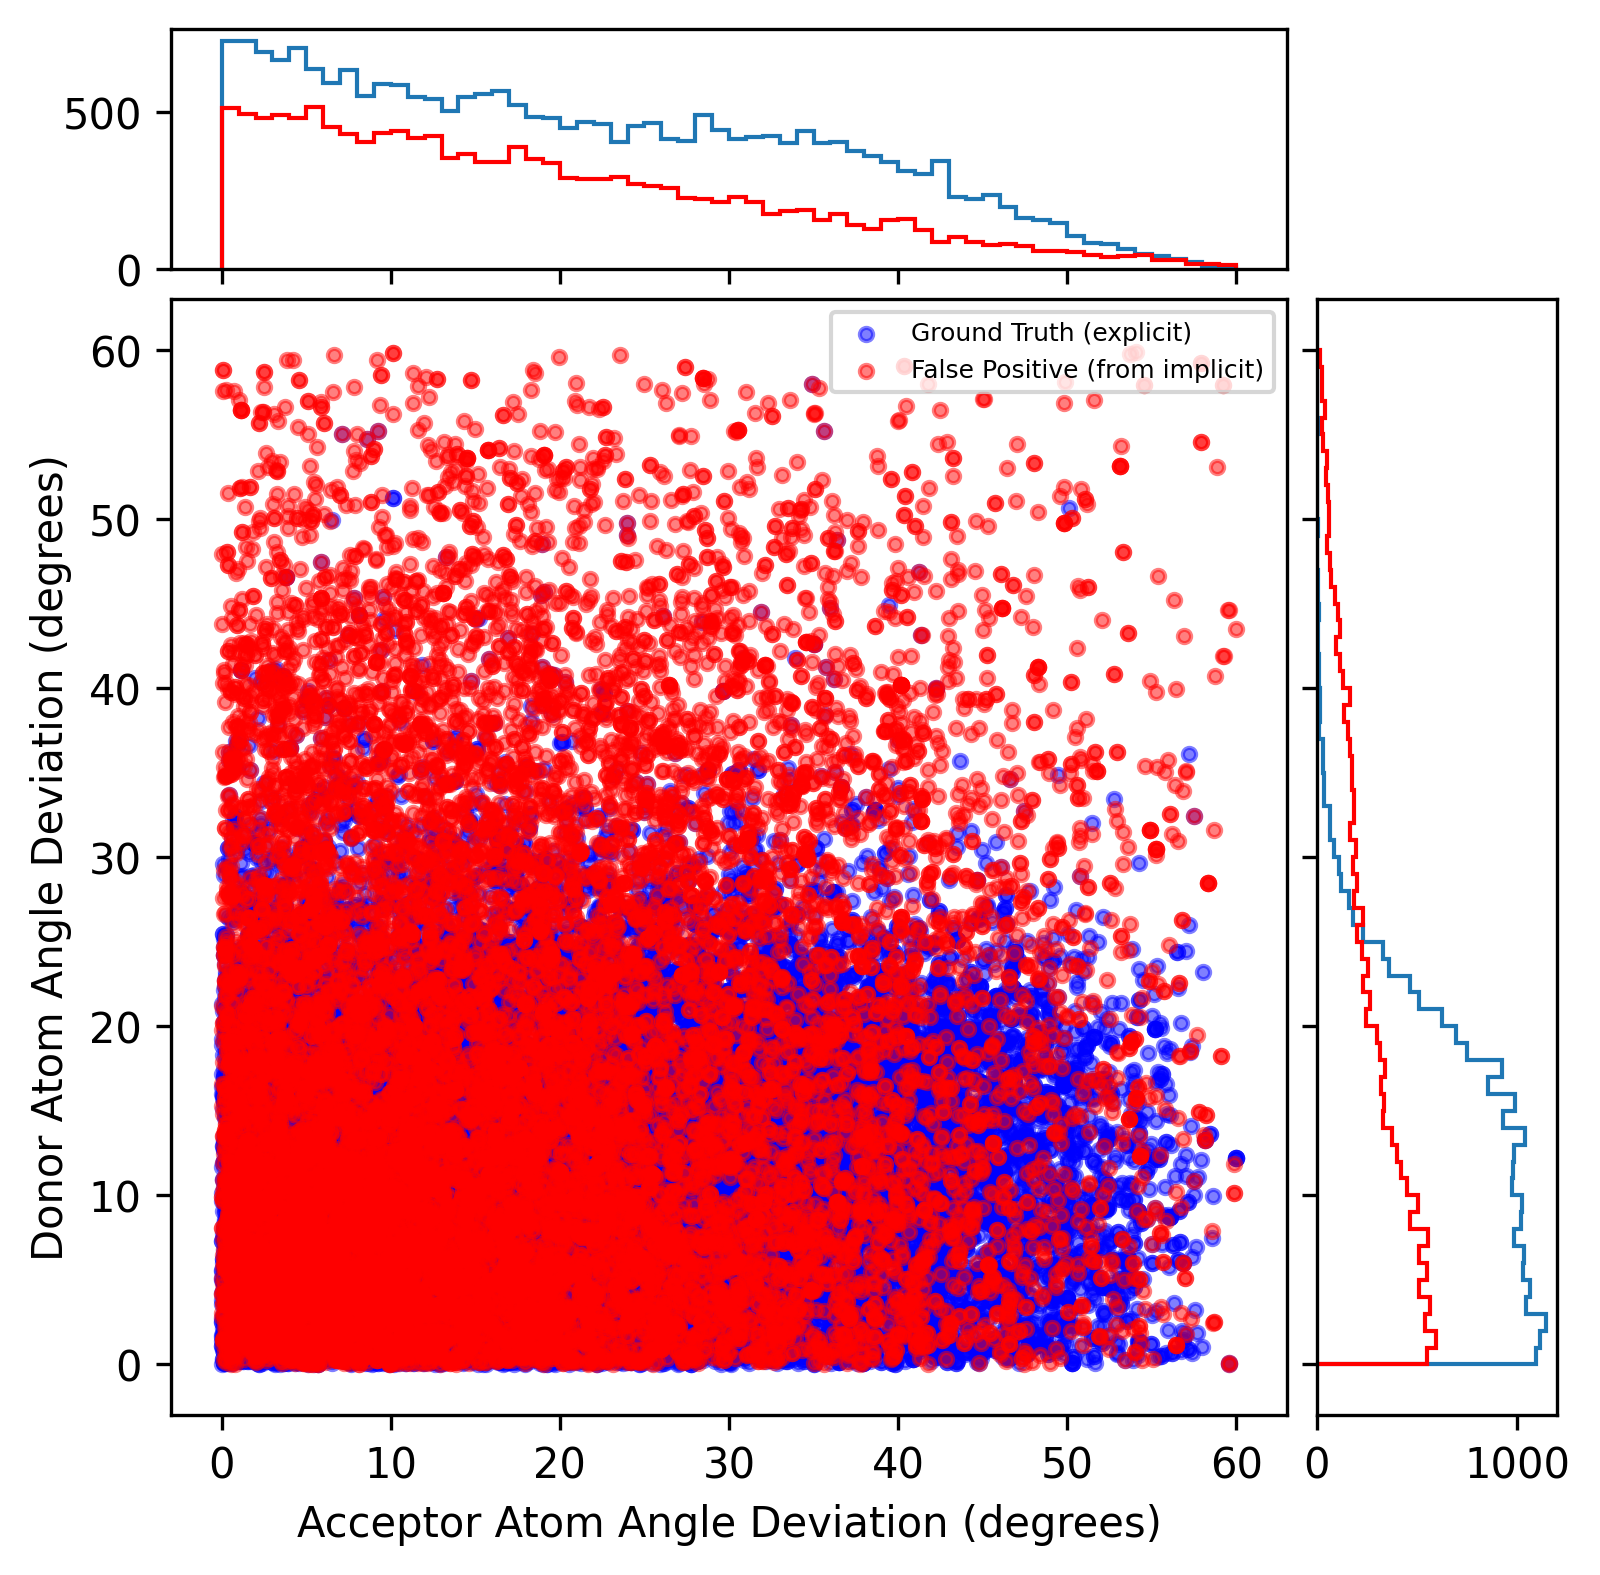

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(dpi=300, figsize=(8, 6))
ax.scatter(all_aaa_dev_list, all_daa_dev_list, s=10, alpha=0.5, c="blue")
ax.scatter(all_fp_aaa_dev_list, all_fp_daa_dev_list, s=10, alpha=0.5, c="red")


# the scatter plot:
# Set aspect of the main Axes.
ax.set_aspect(1.0)

# create new Axes on the right and on the top of the current Axes
divider = make_axes_locatable(ax)
# below height and pad are in inches
ax_histx = divider.append_axes("top", 0.8, pad=0.1, sharex=ax)
ax_histy = divider.append_axes("right", 0.8, pad=0.1, sharey=ax)

# make some labels invisible
ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histy.yaxis.set_tick_params(labelleft=False)

# now determine nice limits by hand:
binwidth = 1
xymax = max(np.max(np.abs(all_aaa_dev_list)), np.max(np.abs(all_daa_dev_list)))
lim = (int(xymax / binwidth) + 1) * binwidth

bins = np.arange(0, lim + binwidth, binwidth)
ax_histx.hist(all_aaa_dev_list, bins=bins, histtype="step")
ax_histx.hist(all_fp_aaa_dev_list, bins=bins, histtype="step", color="red")
ax_histy.hist(all_daa_dev_list, bins=bins, histtype="step", orientation="horizontal")
ax_histy.hist(
    all_fp_daa_dev_list,
    bins=bins,
    orientation="horizontal",
    histtype="step",
    color="red",
)

# the xaxis of ax_histx and yaxis of ax_histy are shared with ax,
# thus there is no need to manually adjust the xlim and ylim of these
# axis.

# ax_histx.set_yticks([0, 50, 100])
# ax_histy.set_xticks([0, 50, 100])

ax.set_xlabel("Acceptor Atom Angle Deviation (degrees)")
ax.set_ylabel("Donor Atom Angle Deviation (degrees)")
ax.legend(
    ["Ground Truth (explicit)", "False Positive (from implicit)"],
    loc="upper right",
    fontsize=6,
)
fig.show()

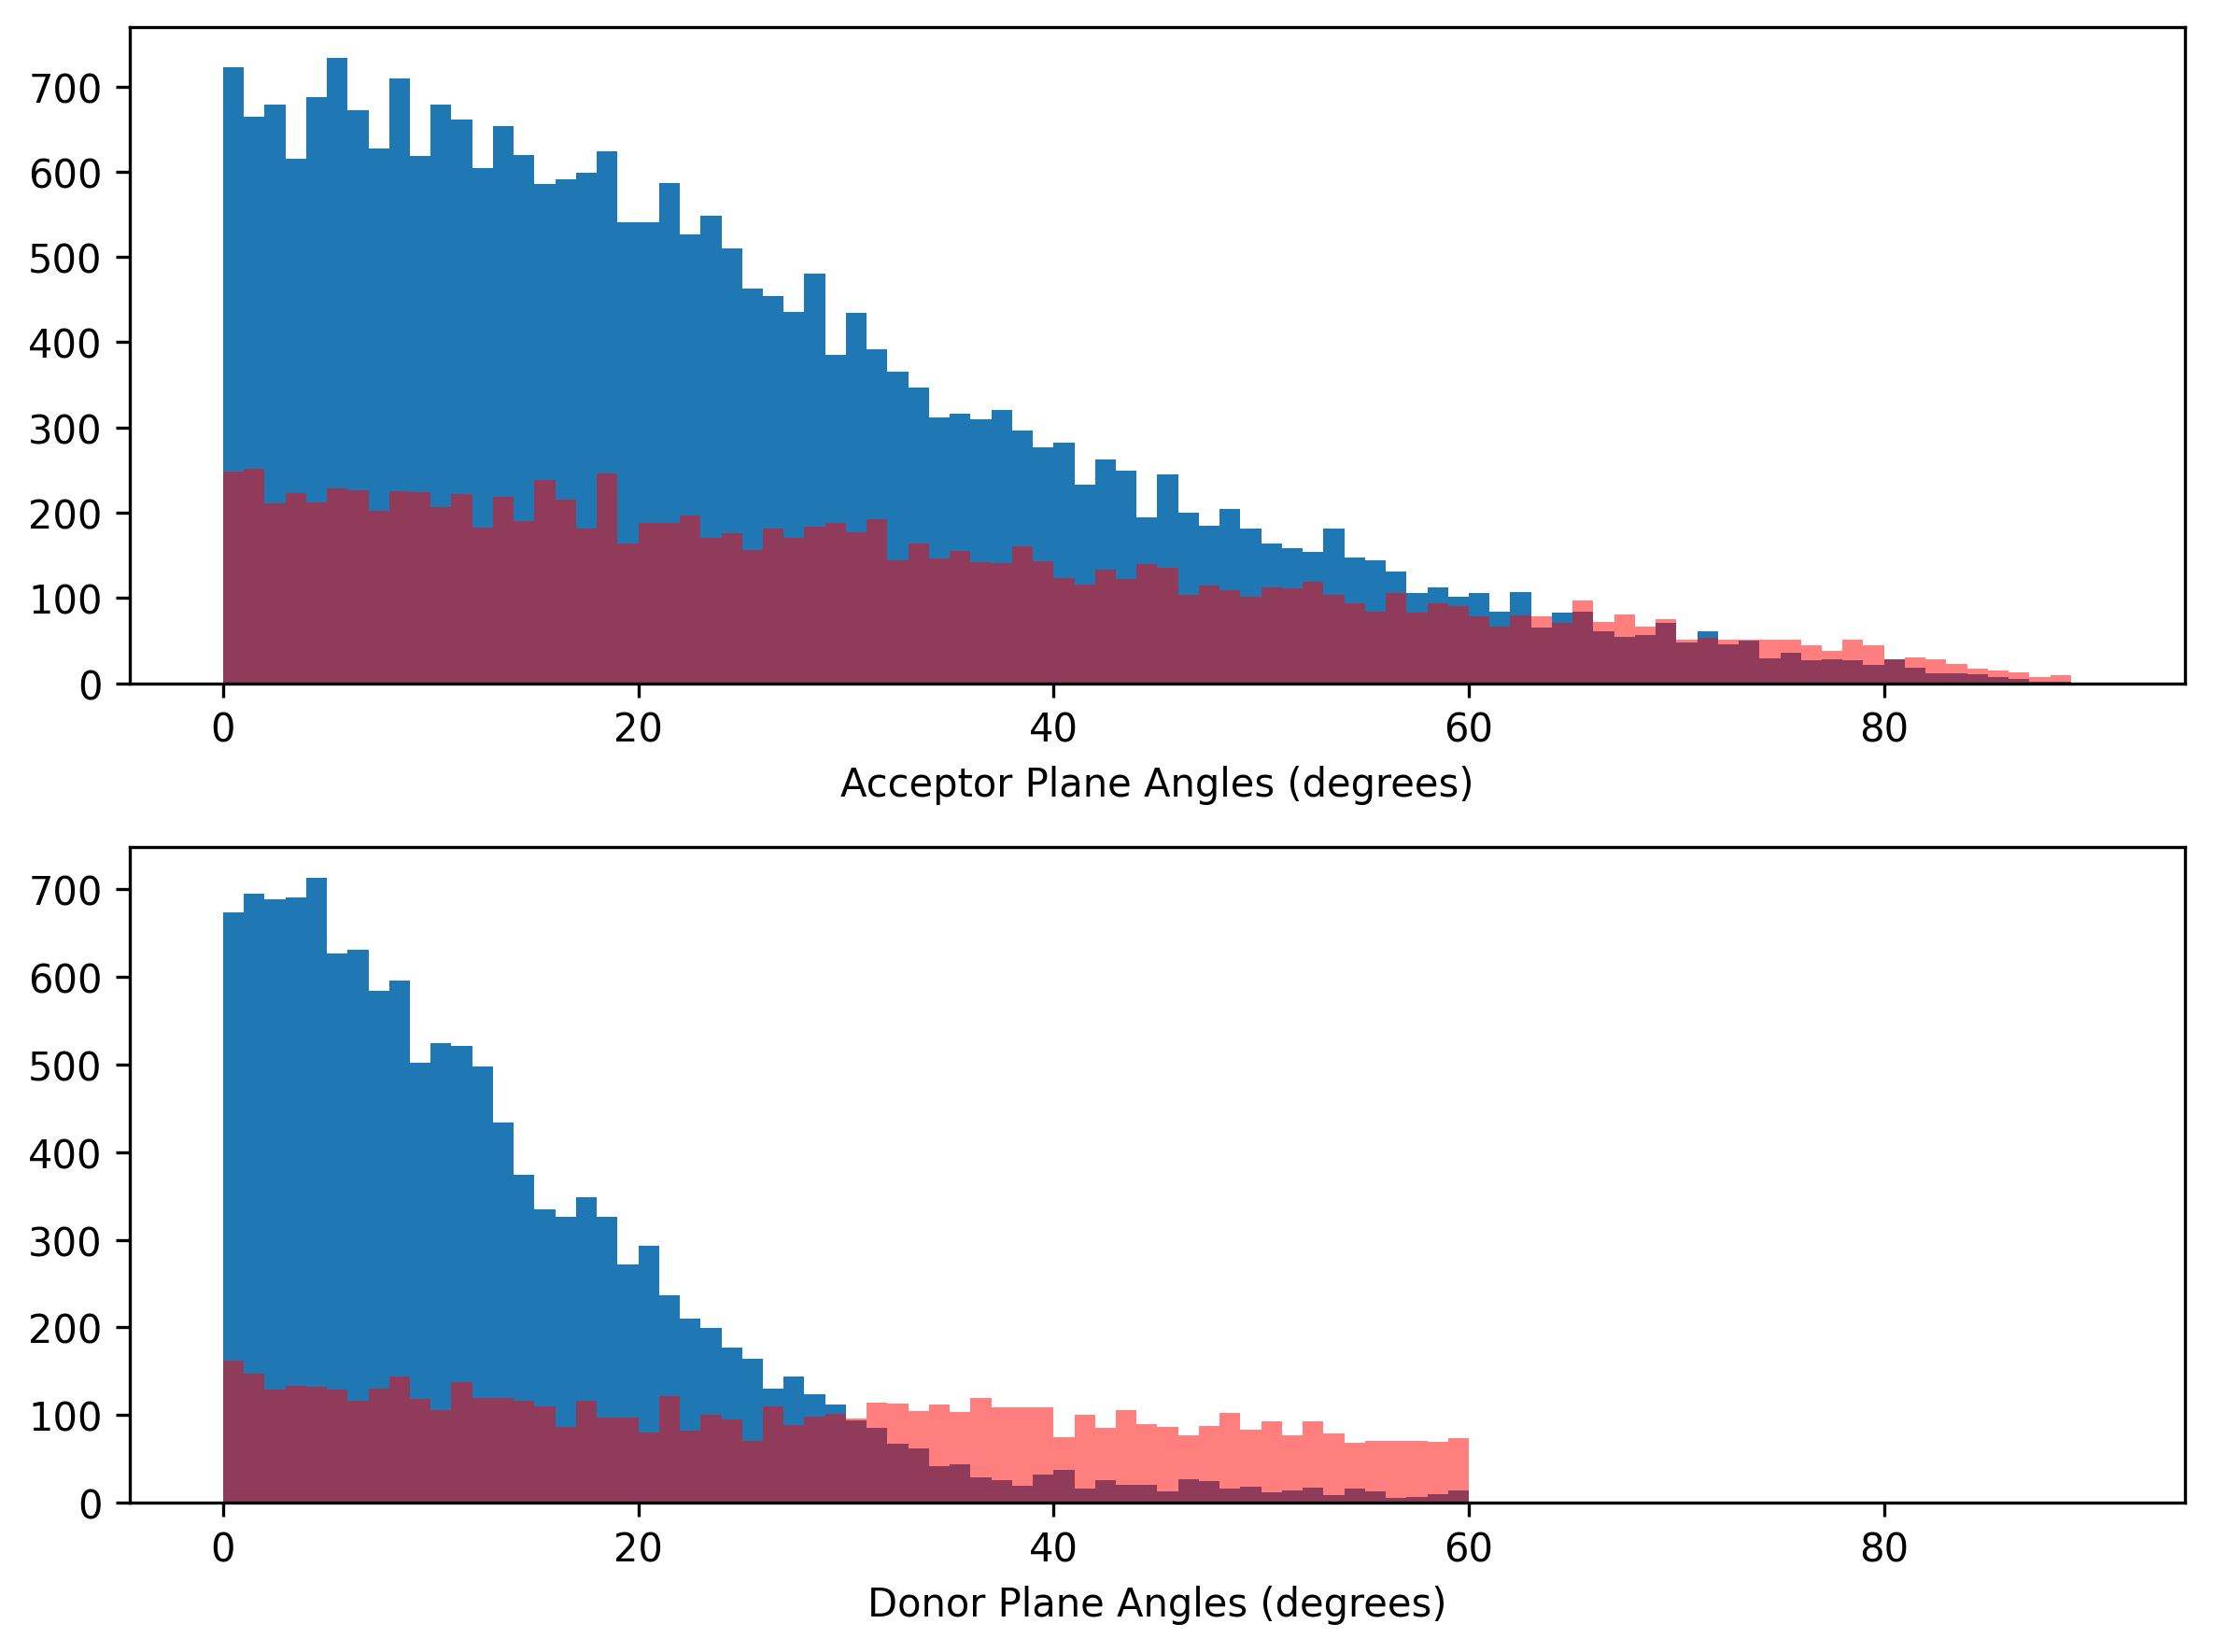

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(2, 1, dpi=300, figsize=(8, 6))

# now determine nice limits by hand:
binwidth = 1
xymax = max(
    np.max(np.abs(all_apa_list)),
    np.max(np.abs(all_dpa_list)),
    np.max(np.abs(all_fp_apa_list)),
    np.max(np.abs(all_fp_dpa_list)),
)
lim = (int(xymax / binwidth) + 1) * binwidth

bins = np.arange(0, lim + binwidth, binwidth)
ax[0].hist(all_apa_list, bins=bins)
ax[0].hist(all_fp_apa_list, bins=bins, alpha=0.5, color="red")
ax[1].hist(all_dpa_list, bins=bins)
ax[1].hist(all_fp_dpa_list, bins=bins, alpha=0.5, color="red")

ax[0].set_xlabel("Acceptor Plane Angles (degrees)")
ax[1].set_xlabel("Donor Plane Angles (degrees)")
fig.tight_layout()
fig.show()

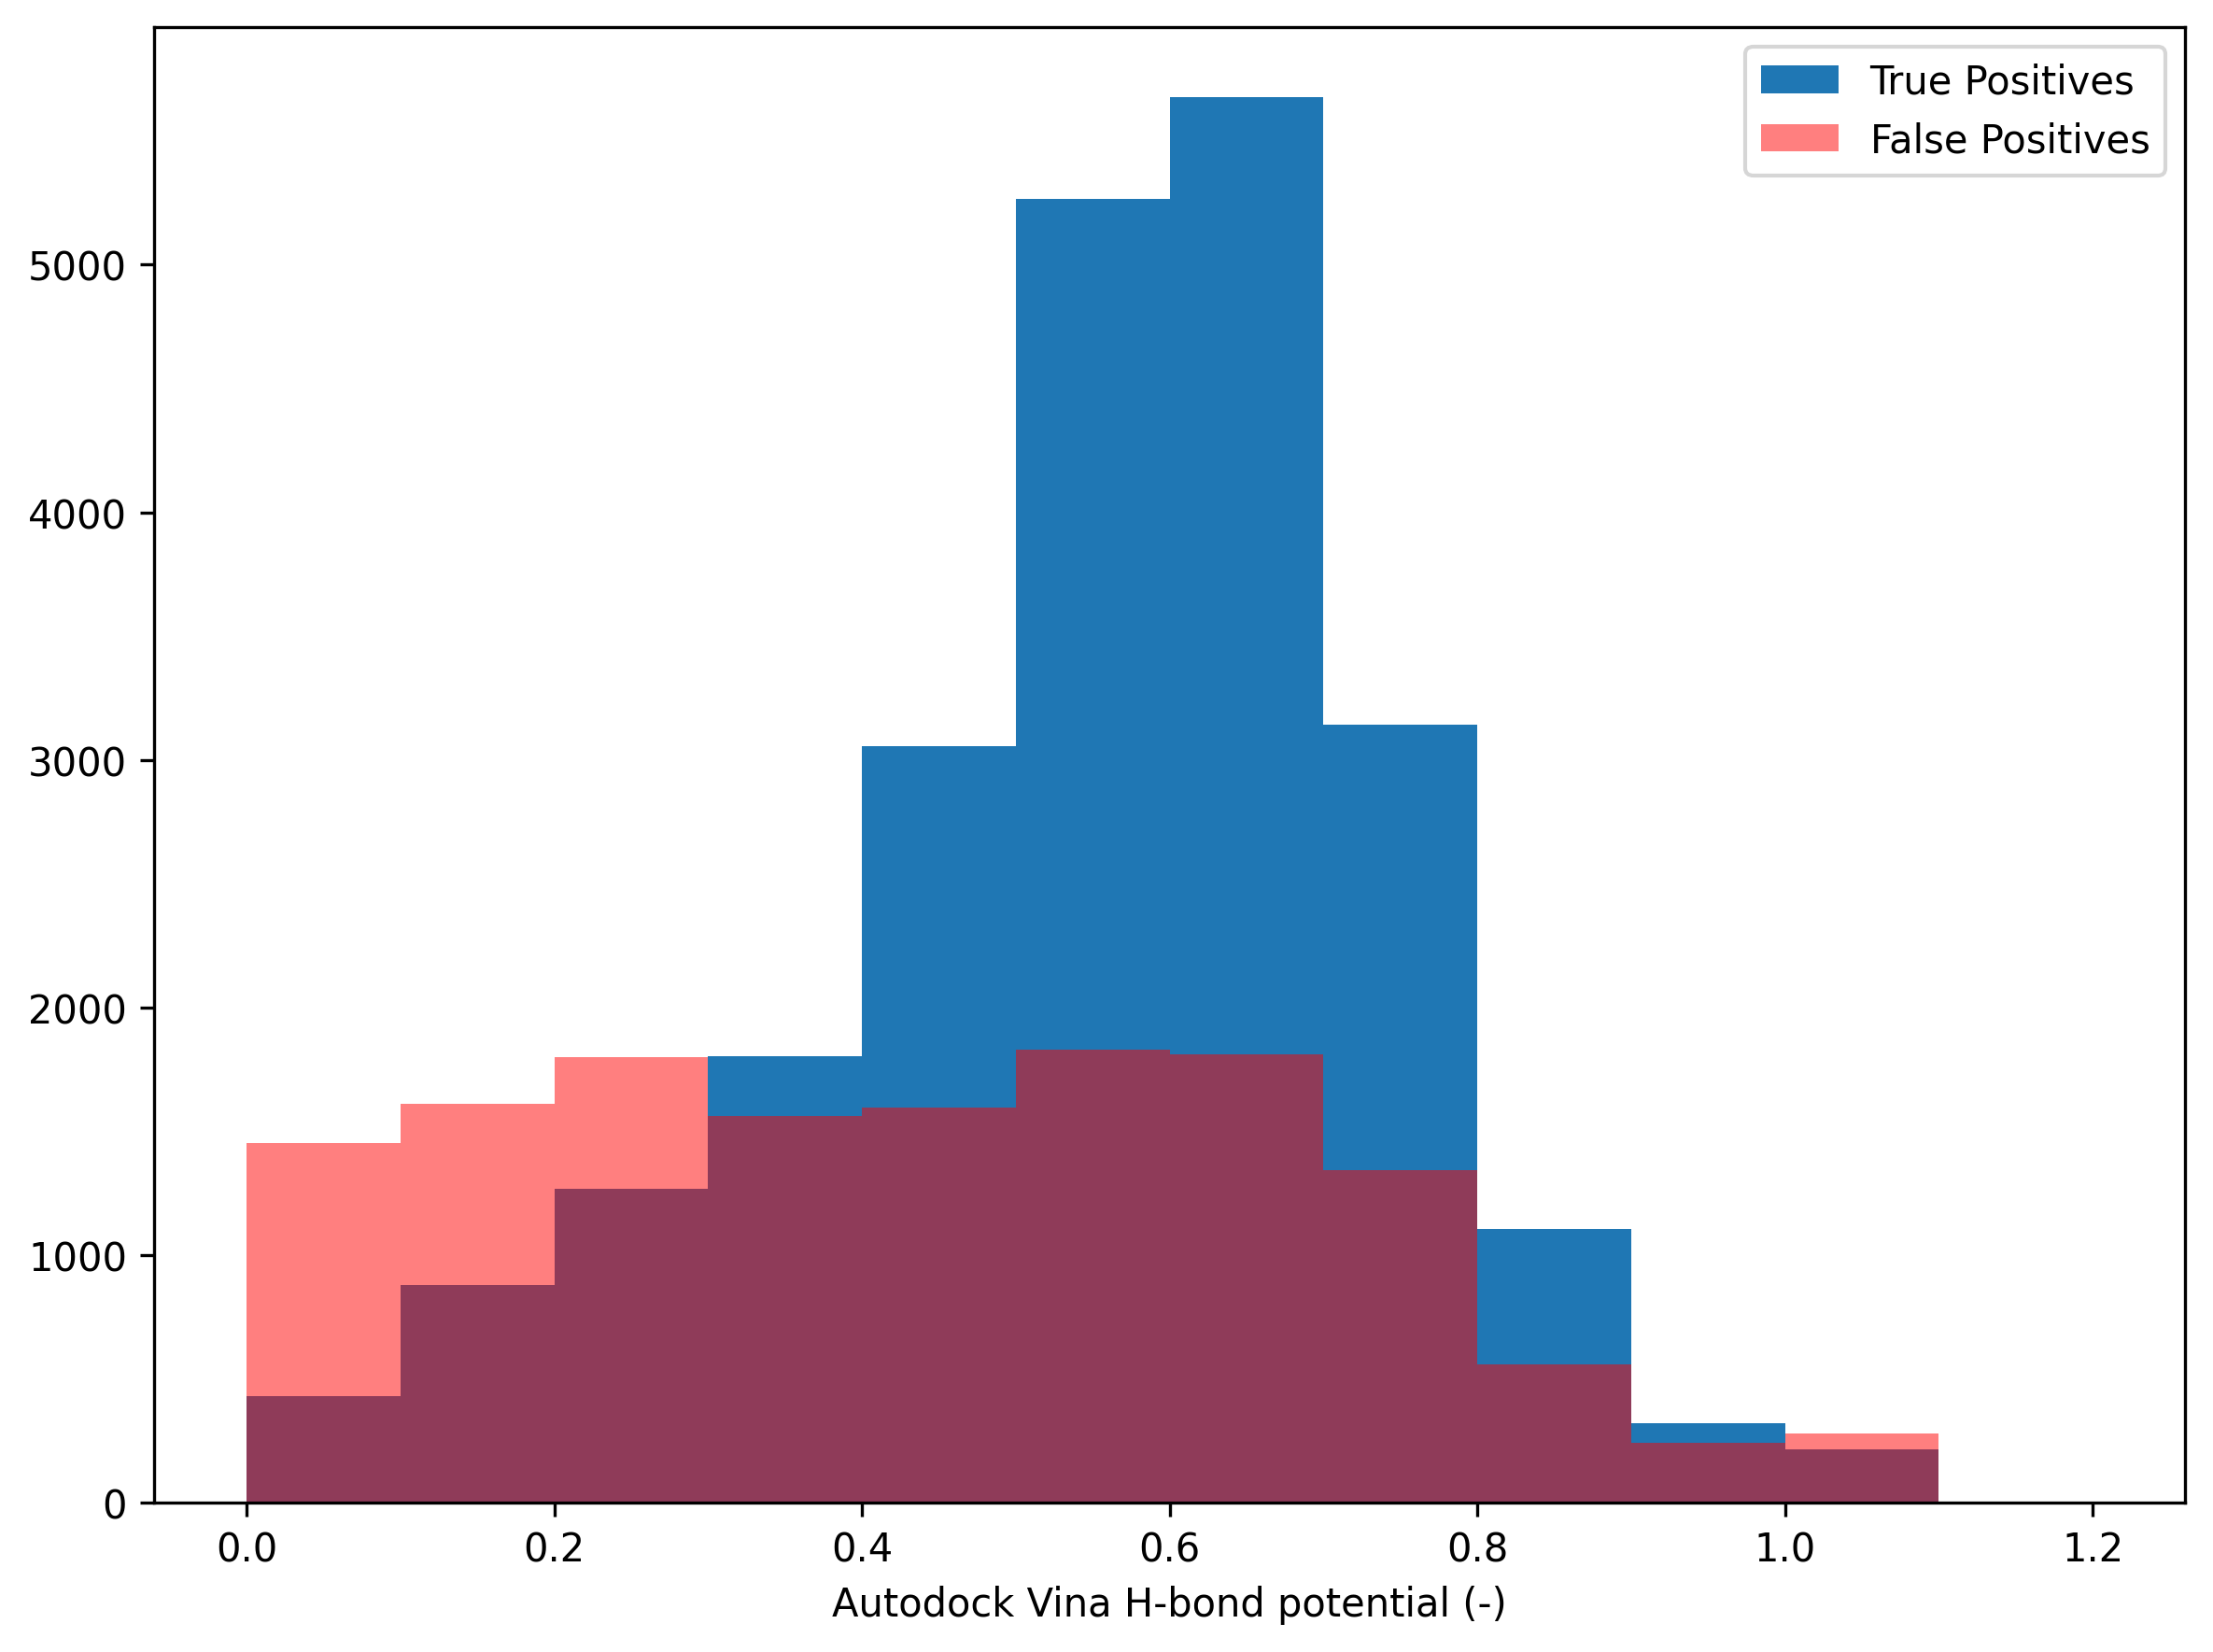

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1, dpi=300, figsize=(8, 6))

# now determine nice limits by hand:
binwidth = 0.1
xymax = max(
    np.max(np.abs(all_vhp_list)),
    np.max(np.abs(all_fp_vhp_list)),
)
lim = (int(xymax / binwidth) + 1) * binwidth

bins = np.arange(0, lim + binwidth, binwidth)
ax.hist(all_vhp_list, bins=bins)
ax.hist(all_fp_vhp_list, bins=bins, alpha=0.5, color="red")

ax.set_xlabel("Autodock Vina H-bond potential (-)")
fig.tight_layout()
ax.legend(["True Positives", "False Positives"])
fig.show()